# Data Processing

## Oct 20, 2022

#### data: wage2 from Wooldridge

### Average and sample standard deviation

In [21]:
#import packages
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
import seaborn as sns
import statistics
import statsmodels.formula.api as smf

#import data
import wooldridge as woo 
wage2 = woo.data('wage2') 
wage2.head()

,wage,hours,IQ,KWW,educ,exper,tenure,age,married,black,south,urban,sibs,brthord,meduc,feduc,lwage
0,769,40,93,35,12,11,2,31,1,0,0,1,1,2.0,8.0,8.0,6.645091
1,808,50,119,41,18,11,16,37,1,0,0,1,1,NaN,14.0,14.0,6.694562
2,825,40,108,46,14,11,9,33,1,0,0,1,1,2.0,14.0,14.0,6.715384
3,650,40,96,32,12,13,7,32,1,0,0,1,4,3.0,12.0,12.0,6.476973
4,562,40,74,27,11,14,5,34,1,0,0,1,10,6.0,6.0,11.0,6.331502


In [22]:
# Average IQ
wage2['IQ'].mean()

101.28235294117647

In [23]:
# Average salary
wage2['wage'].mean()

957.9454545454546

In [24]:
# Standard Deviation of IQ
wage2['IQ'].std()

15.0526363702651

### Model Overview

In [27]:
reg1 = smf.ols('wage ~ IQ', data = wage2)
result1 = reg1.fit()
result1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   wage   R-squared:                       0.096
Model:                            OLS   Adj. R-squared:                  0.095
Method:                 Least Squares   F-statistic:                     98.55
Date:                Wed, 19 Oct 2022   Prob (F-statistic):           3.79e-22
Time:                        21:20:31   Log-Likelihood:                -6891.4
No. Observations:                 935   AIC:                         1.379e+04
Df Residuals:                     933   BIC:                         1.380e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    116.9916     85.642      1.366      0.172     -51.081     285.064
IQ             8.3031      0.836      9.927      0.000       6.662       9.944
==============================================================================
Omnibus:                      208.281   Durbin-Watson:                   1.802
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              532.184
Skew:                           1.157   Prob(JB):                    2.74e-116
Kurtosis:                       5.882   Cond. No.                         697.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
15*8.3031

124.54650000000001

The wage goes up by 124.5465

In [30]:
reg2 = smf.ols('np.log(wage) ~ IQ', data = wage2)
result2 = reg2.fit()
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           np.log(wage)   R-squared:                       0.099
Model:                            OLS   Adj. R-squared:                  0.098
Method:                 Least Squares   F-statistic:                     102.6
Date:                Wed, 19 Oct 2022   Prob (F-statistic):           5.93e-23
Time:                        22:04:30   Log-Likelihood:                -468.85
No. Observations:                 935   AIC:                             941.7
Df Residuals:                     933   BIC:                             951.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.8870      0.089     66.131      0.000       5.712       6.062
IQ             0.0088      0.001     10.130      0.000       0.007       0.011
==============================================================================
Omnibus:                       32.293   Durbin-Watson:                   1.793
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               45.621
Skew:                          -0.329   Prob(JB):                     1.24e-10
Kurtosis:                       3.859   Cond. No.                         697.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
0.0088*15*100

13.200000000000001

Wage increases by 13.2%

### Intercept

The intercept of model 'wage ~ IQ' means that the wage is 116.9916 if IQ is 0. 
The intercept of model 'log(wage) ~ IQ' means that the log(wage) is 5.8870 when IQ is 0. 
Both are not meaningful because we won't think a person as having no intelligence (IQ=0). 

### Residuals plot

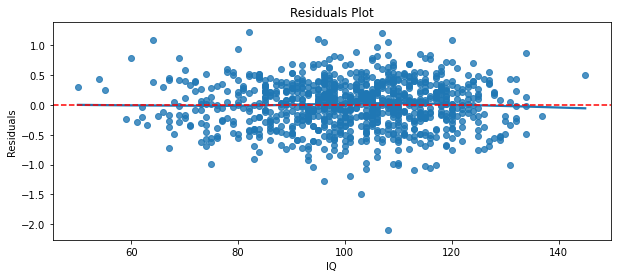

In [39]:
plt.figure(figsize = (10,4))
sns.regplot(x=wage2[wage2.wage>0].IQ, y=result2.resid, lowess = True)
plt.axhline(0, linestyle ='--', color='red')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.show()

The residuals are randomly distributed approximately symmetrically around the 0 red line. And the lowess smoother corresponds well with the 0 line. It means that the linear regression model fits well with the observations.

### Cook’s distance plot

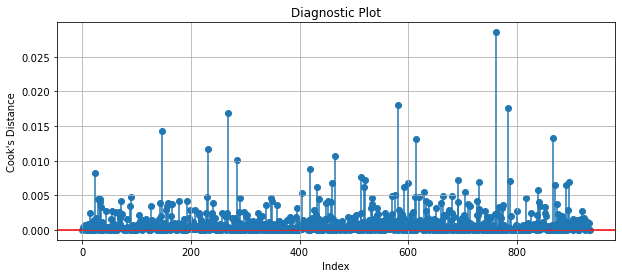

In [40]:
cooks_distance_1 = result2.get_influence().cooks_distance
plt.figure(figsize = (10,4))
plt.scatter(wage2[wage2.wage>0].index, cooks_distance_1[0])
plt.axhline(0, color = 'red')
plt.vlines(x=wage2[wage2.wage>0].index, ymin=0, ymax=cooks_distance_1[0])
plt.xlabel('Index')
plt.ylabel('Cook\'s Distance')
plt.title('Diagnostic Plot')
plt.grid()

Yes I do notice the influential points. Some of them have a large cook's distance in the graph above.

### DFFITS

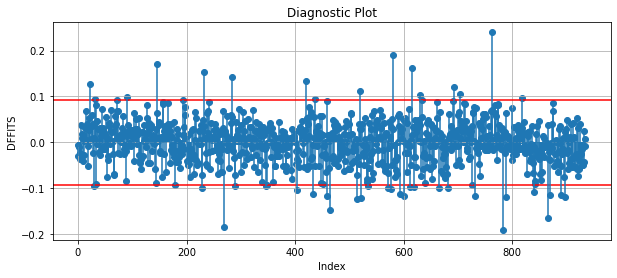

In [41]:
dffits, threshold = result2.get_influence().dffits
plt.figure(figsize=(10,4))
plt.scatter(wage2[wage2.wage>0].index, dffits)
plt.axhline(threshold, color='red')
plt.axhline(-threshold, color='red')
plt.vlines(x=wage2[wage2.wage>0].index, ymin=0, ymax=dffits)
plt.xlabel('Index')
plt.ylabel('DFFITS')
plt.title('Diagnostic Plot')
plt.grid()

We can tell from the graph that there are a few influential points which exceed the range of other values.

### Set a test threshold and remove suspected outliers using Cook’s Distance

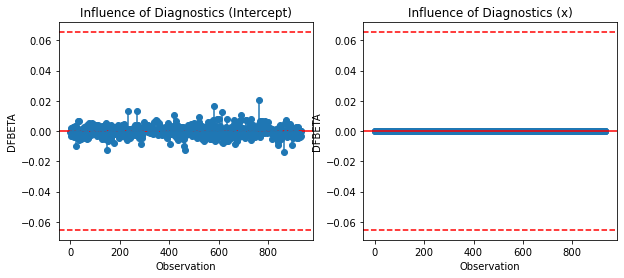

In [50]:
result2.get_influence().dfbeta[:5,:]
# Pull out the dfbeta values for each coeff
dfb_intercepts = result2.get_influence().dfbeta[:,0]
dfb_x = result2.get_influence().dfbeta[:,1]
# calculate the threshold using 2/sqrt(n)
thresh = 2/np.sqrt(len(result2.fittedvalues))

fig, ax = plt.subplots(1,2,figsize=(10,4))
ax[0].scatter(result2.fittedvalues.index, dfb_intercepts)
ax[0].axhline(-thresh, color='red', linestyle='--')
ax[0].axhline(thresh, color='red', linestyle='--')
ax[0].axhline(0, color='red')
ax[0].vlines(x=wage2[wage2.wage>0].index, ymin=0, ymax=dfb_intercepts)
ax[0].set_title('Influence of Diagnostics (Intercept)')
ax[0].set_xlabel('Observation')
ax[0].set_ylabel('DFBETA')

ax[1].scatter(result2.fittedvalues.index, dfb_x)
ax[1].axhline(-thresh, color='red', linestyle='--')
ax[1].axhline(thresh, color='red', linestyle='--')
ax[1].axhline(0, color='red')
ax[1].vlines(x=wage2[wage2.wage>0].index, ymin=0, ymax=dfb_x)
ax[1].set_title('Influence of Diagnostics (x)')
ax[1].set_xlabel('Observation')
ax[1].set_ylabel('DFBETA')

plt.show()

In [54]:
# Drop unusual values using cooks cutoff
#drop_indices = [i for i,v in enumerate (diagnostic_values) if v>cutoff]
#wage2.drop(drop_indices)
newdata = wage2[cooks_distance_1[0]<4/len(cooks_distance_1[0])]

### Description of the new fitted model

In [55]:
reg_new = smf.ols('np.log(wage) ~ IQ', data = newdata)
result_new = reg_new.fit()
result_new.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           np.log(wage)   R-squared:                       0.131
Model:                            OLS   Adj. R-squared:                  0.130
Method:                 Least Squares   F-statistic:                     133.8
Date:                Wed, 19 Oct 2022   Prob (F-statistic):           6.38e-29
Time:                        23:21:45   Log-Likelihood:                -335.20
No. Observations:                 891   AIC:                             674.4
Df Residuals:                     889   BIC:                             684.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.8304      0.084     69.463      0.000       5.666       5.995
IQ             0.0095      0.001     11.566      0.000       0.008       0.011
==============================================================================
Omnibus:                        7.323   Durbin-Watson:                   1.876
Prob(Omnibus):                  0.026   Jarque-Bera (JB):                6.736
Skew:                          -0.163   Prob(JB):                       0.0345
Kurtosis:                       2.727   Cond. No.                         727.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

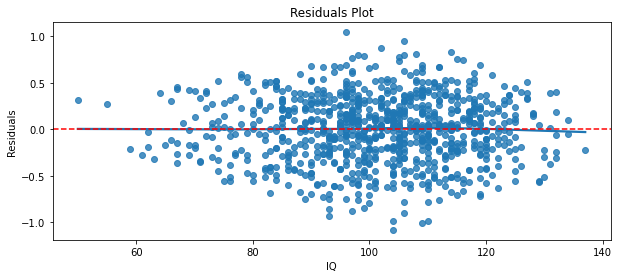

In [57]:
# Residual plot of new model
plt.figure(figsize = (10,4))
sns.regplot(x=newdata[newdata.wage>0].IQ, y=result_new.resid, lowess = True)
plt.axhline(0, linestyle ='--', color='red')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.show()

The overall performance of the residuals plot seems better than the previous model. The points are clustered around the 0 line.

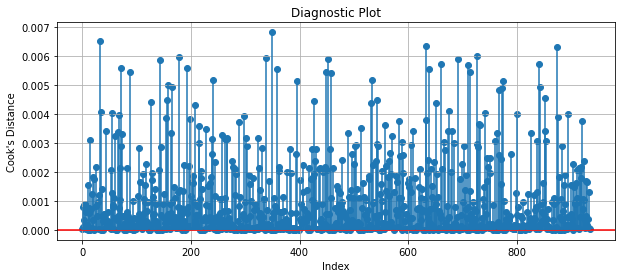

In [56]:
# Cook's distance of new model
cooks_distance_new = result_new.get_influence().cooks_distance
plt.figure(figsize = (10,4))
plt.scatter(newdata[newdata.wage>0].index, cooks_distance_new[0])
plt.axhline(0, color = 'red')
plt.vlines(x=newdata[newdata.wage>0].index, ymin=0, ymax=cooks_distance_new[0])
plt.xlabel('Index')
plt.ylabel('Cook\'s Distance')
plt.title('Diagnostic Plot')
plt.grid()

We see no outstanding outliers now after dropping the unusual observations. The cook's distance for each observation is similar. 
After dropping outliers, the regression model performs better with a r-squared value of 0.131. The coefficients slightly changed to 5.8304(intercept) and 0.0095(slope).

### Potential concerns that might be balanced when deciding to remove influential observations

The overall performace of the model looks better after we dropped the influential points using the cooks cutoff. R-squared value increased, which suggests a better fit. The residuals plot looks nearly perfect. Excluding the outliers makes our results more statistically significant. 